<a href="https://colab.research.google.com/github/ArupDukeBanerjee/Clustering-mixed-variable-type-data/blob/main/gower_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gower

data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
distance_matrix = gower.gower_matrix(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
distance_matrix

array([[0.        , 0.11675824, 0.34104055, ..., 0.37924474, 0.36607143,
        0.4151295 ],
       [0.11675824, 0.        , 0.44818342, ..., 0.2982008 , 0.4635989 ,
        0.2983713 ],
       [0.34104055, 0.44818342, 0.        , ..., 0.7065715 , 0.5862554 ,
        0.7424563 ],
       ...,
       [0.37924474, 0.2982008 , 0.7065715 , ..., 0.        , 0.16539812,
        0.05511555],
       [0.36607143, 0.4635989 , 0.5862554 , ..., 0.16539812, 0.        ,
        0.17543171],
       [0.4151295 , 0.2983713 , 0.7424563 , ..., 0.05511555, 0.17543171,
        0.        ]], dtype=float32)

In [ ]:
from scipy.cluster.hierarchy import fcluster, ward, dendrogram, single, dendrogram

In [ ]:
t = single(distance_matrix)
# extract clusters
clusters = pd.DataFrame({"cluster":fcluster(t, 20, criterion='maxclust')})

In [ ]:
t.shape

(199, 4)

Text(0.5, 1.0, 'Frequency of clusters')

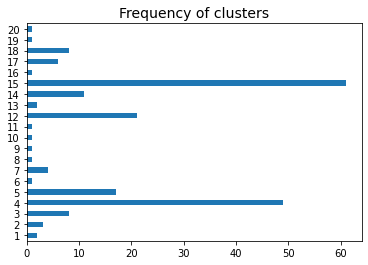

In [ ]:
clusters.cluster.value_counts().sort_index().plot.barh()
plt.title("Frequency of clusters", fontsize = 14)

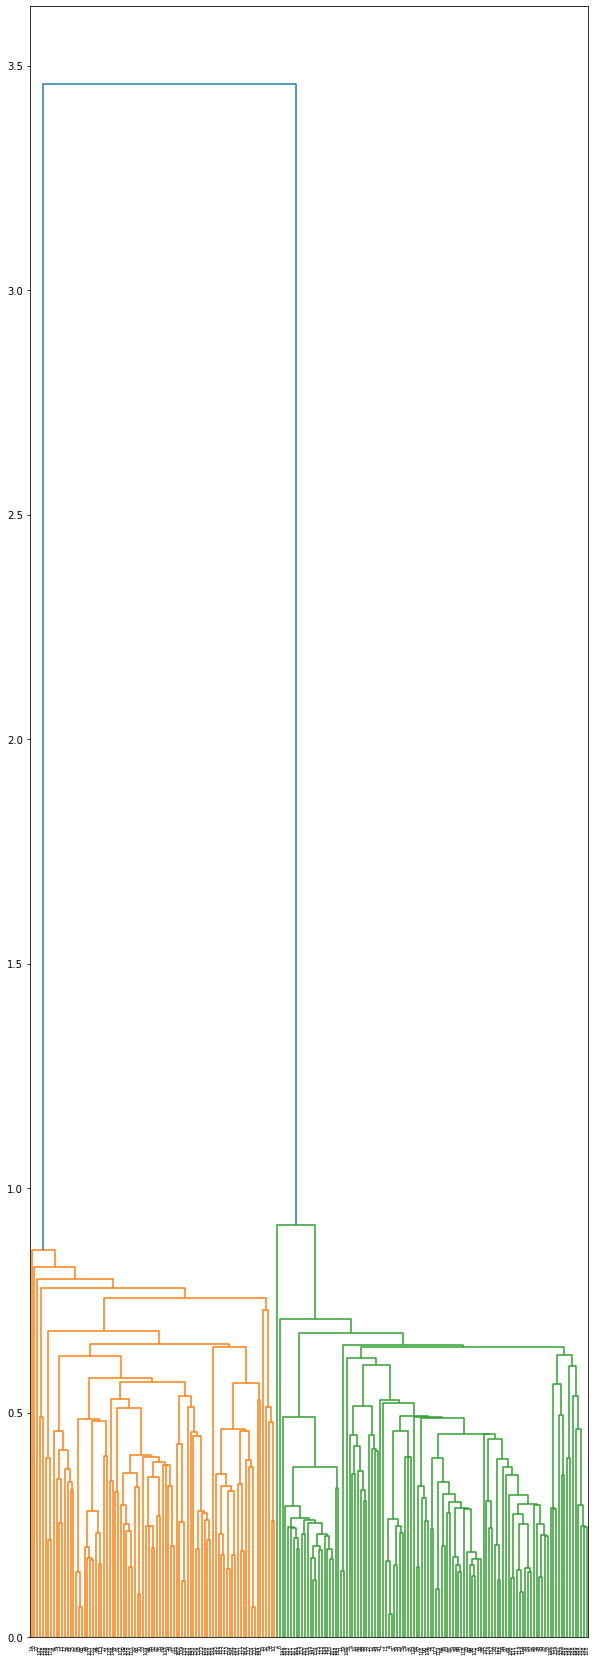

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 30)) 
dend = shc.dendrogram(t)